# Clustering Crypto

In [64]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

#### 1. Read in the crypto_data.csv to the Pandas DataFrame named crypto_df

In [65]:
file_path = Path("../Resources/crypto_data.csv")
# First column is missing a header
#https://stackoverflow.com/questions/36519086/
#how-to-get-rid-of-unnamed-0-column-in-a-pandas-dataframe
crypto_df = pd.read_csv(file_path,index_col=[0])
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


#### 2. Keep all the cryptocurrencies that are being traded.

In [66]:
crypto_df = crypto_df.loc[(crypto_df['IsTrading'] == True)]

# crypto_df.shape
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


#### 3. Drop the IsTrading column

In [67]:
crypto_df.drop(columns= ['IsTrading'],inplace=True)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [68]:
# crypto_df.value_counts('Algorithm')

In [69]:
#Find null values
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


#### 4. Remove rows that have at least one null value.

In [70]:
crypto_df = crypto_df.dropna()
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


#### 5. Filter the crypto_df DataFrame so it only has rows where coins have been mined

In [71]:
# only has rows where coins have been mined (TotalCoinsMined>0)
crypto_df = crypto_df.loc[(crypto_df['TotalCoinsMined'] > 0)]
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


#### 6. Create a new DataFrame that holds only the cryptocurrency names, and use the crypto_df DataFrame index as the index for this new DataFrame.

In [72]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coins_df = crypto_df[['CoinName']]
coins_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


#### 7. Remove the CoinName column from the crypto_df DataFrame

In [73]:
crypto_df.drop(columns= ['CoinName'],inplace=True)
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


#### 8.Use get_dummies() to create variables for text features.

In [74]:
X = pd.get_dummies(data=crypto_df, columns=['Algorithm', 'ProofType'])
X.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 9. Standardize the data with StandardScaler() 

In [75]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:10])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

#### 2. Using PCA to reduce dimension to three principal components.

In [17]:
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(X_scaled)

In [76]:
pca.explained_variance_ratio_

# Pretty low % of variance explained by all three PC's. Only ~7%

array([0.02792785, 0.02138662, 0.02050779])

#### 3. Create a DataFrame with the three principal components.

In [79]:
pcs_df = pd.DataFrame(data=crypto_pca, columns=["PC 1", "PC 2", "PC 3"],index=X.index)
pcs_df.head(10)

,PC 1,PC 2,PC 3
42,-0.346916,0.951807,-0.582208
404,-0.330239,0.951956,-0.582666
1337,2.296031,1.598279,-0.685918
BTC,-0.140944,-1.261687,0.215650
ETH,-0.142008,-2.003460,0.384193
LTC,-0.163475,-1.153857,-0.018971
DASH,-0.413790,1.211571,-0.501269
XMR,-0.141333,-2.234081,0.429108
ETC,-0.140448,-2.003562,0.384165
ZEC,-0.146113,-2.005382,0.392266


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

#### 2. Using the pcs_df DataFrame, create an elbow curve using hvPlot to find the best value for K

C:\Users\lindgp1\.conda\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



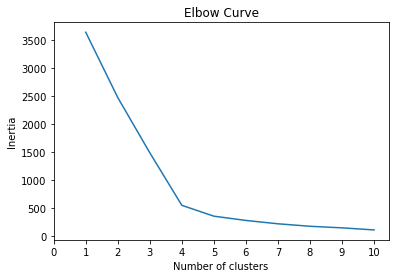

In [80]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Running K-Means with `k=4`

#### 3. Use the pcs_df DataFrame to run the K-means algorithm to make predictions of the K clusters for the cryptocurrencies’ data

In [81]:
# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Add the predicted class column to the dataframe
pcs_df["Class"] = model.labels_
pcs_df.head()

,PC 1,PC 2,PC 3,Class
42,-0.346916,0.951807,-0.582208,0
404,-0.330239,0.951956,-0.582666,0
1337,2.296031,1.598279,-0.685918,0
BTC,-0.140944,-1.261687,0.215650,3
ETH,-0.142008,-2.003460,0.384193,3


#### 4. Create a new DataFrame including predicted clusters and cryptocurrencies features. 

In [86]:
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = crypto_df.join(pcs_df)

#### 5. Add the CoinName column that holds the names of the cryptocurrencies

In [89]:
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = crypto_df.join(pcs_df)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = coins_df.join(clustered_df)

#### 6. Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.

In [90]:
clustered_df = clustered_df[['Algorithm','ProofType','TotalCoinsMined','TotalCoinSupply',
                            'PC 1', 'PC 2', 'PC 3', 'CoinName', 'Class']]
# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.346916,0.951807,-0.582208,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.330239,0.951956,-0.582666,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.296031,1.598279,-0.685918,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.140944,-1.261687,0.215650,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.142008,-2.003460,0.384193,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.163475,-1.153857,-0.018971,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.413790,1.211571,-0.501269,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.141333,-2.234081,0.429108,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.140448,-2.003562,0.384165,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.146113,-2.005382,0.392266,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

#### 2. Creating a 3D-Scatter with the PCA data and the clusters
#### 3. Add the CoinName and Algorithm columns to the hover_name and hover_data parameters, respectively, so each data point shows the CoinName and Algorithm on hover.

In [92]:
import plotly.express as px
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name='CoinName',
    hover_data=['Algorithm']
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### 4. Create a table with tradable cryptocurrencies

In [93]:
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType',
                                  'TotalCoinSupply', 'TotalCoinsMined', 'Class'], 
                                  sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

#### 5. Print the total number of tradable cryptocurrencies

In [95]:
tradeable = len(clustered_df.index)

print(f"There are {len(clustered_df.index)} tradeable crytocurrencies")

There are 532 tradeable crytocurrencies


#### 6. Scaling data to create the scatter plot with tradable cryptocurrencies.

In [96]:
subset_df = clustered_df[['TotalCoinsMined','TotalCoinSupply']]
X_scaled = MinMaxScaler().fit_transform(subset_df)
X_scaled

array([[0.00000000e+00, 4.20000000e-11],
       [1.06585544e-03, 5.32000000e-04],
       [2.95755135e-02, 3.14159265e-01],
       ...,
       [9.90135079e-04, 1.40022261e-03],
       [7.37028150e-06, 2.10000000e-05],
       [1.29582282e-07, 1.00000000e-06]])

#### 7. Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.

In [ ]:
X_df = pd.DataFrame(
        data=X_scaled, columns=['TotalCoinSupply','TotalCoinsMined'],index=X.index)
# X_df.head()

#### 8. Add the CoinName column from the clustered_df DataFrame to the new DataFrame

In [97]:
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE
X_coins_df = X_df.join(coins_df)
# X_coins_df.head()

#### 9. Add the Class column from the clustered_df DataFrame to the new DataFrame.

In [98]:
cl_df = pd.DataFrame(clustered_df, columns=['Class'])
plot_df = X_coins_df.join(cl_df, how='inner')

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,0.000000,4.200000e-11,42 Coin,0
404,0.001066,5.320000e-04,404Coin,0
1337,0.029576,3.141593e-01,EliteCoin,0
BTC,0.000018,2.100000e-05,Bitcoin,3
ETH,0.000109,0.000000e+00,Ethereum,3
LTC,0.000064,8.400000e-05,Litecoin,3
DASH,0.000009,2.200000e-05,Dash,0
XMR,0.000017,0.000000e+00,Monero,3
ETC,0.000115,2.100000e-04,Ethereum Classic,3
ZEC,0.000007,2.100000e-05,ZCash,3


#### 10. Create a hvplot.scatter plot

In [99]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    y="TotalCoinsMined",
    x="TotalCoinSupply",
    by ='Class',
    hover_cols=['CoinName'],
    legend = 'bottom_right'
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinSupply]   (TotalCoinsMined,CoinName)